In [1]:

import pandas as pd 
import numpy as np 
import sweetviz as sv
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set(rc={"figure.figsize":(15.,8.)})
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')


# Can we predict house prices based on features 

In [2]:
df=pd.read_csv('regression_data.csv')

In [3]:
df.shape

(21597, 21)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [5]:
df.head()

id        date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  13/10/2014         3       1.00         1180      5650     1.0   
1  6414100192  09/12/2014         3       2.25         2570      7242     2.0   
2  5631500400  25/02/2015         2       1.00          770     10000     1.0   
3  2487200875  09/12/2014         4       3.00         1960      5000     1.0   
4  1954400510  18/02/2015         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0           0     0          3  ...        1180              0      1955   
1           0     0          3  ...        2170            400      1951   
2           0     0          3  ...         770              0      1933   
3           0     0          5  ...        1050            910      1965   
4           0     0          3  ...        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000  
3             0    98136  47.5208 -122.393           1360        5000  604000  
4             0    98074  47.6168 -122.045           1800        7503  510000  

[5 rows x 21 columns]

In [6]:
df.tail()


id        date  bedrooms  bathrooms  sqft_living  sqft_lot  \
21592   263000018  21/05/2014         3       2.50         1530      1131   
21593  6600060120  23/02/2015         4       2.50         2310      5813   
21594  1523300141  23/06/2014         2       0.75         1020      1350   
21595   291310100  16/01/2015         3       2.50         1600      2388   
21596  1523300157  15/10/2014         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
21592     3.0           0     0          3  ...        1530              0   
21593     2.0           0     0          3  ...        2310              0   
21594     2.0           0     0          3  ...        1020              0   
21595     2.0           0     0          3  ...        1600              0   
21596     2.0           0     0          3  ...        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
21592      2009             0    98103  47.6993 -122.346           1530   
21593      2014             0    98146  47.5107 -122.362           1830   
21594      2009             0    98144  47.5944 -122.299           1020   
21595      2004             0    98027  47.5345 -122.069           1410   
21596      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15   price  
21592        1509  360000  
21593        7200  400000  
21594        2007  402101  
21595        1287  400000  
21596        1357  325000  

[5 rows x 21 columns]

In [7]:
df.describe()


id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   4.580474e+09      3.373200      2.115826   2080.321850  1.509941e+04   
std    2.876736e+09      0.926299      0.768984    918.106125  4.141264e+04   
min    1.000102e+06      1.000000      0.500000    370.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1430.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068500e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.007547      0.234292      3.409825      7.657915   
std        0.539683      0.086549      0.766390      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     291.725008   1970.999676     84.464787  98077.951845   
std      827.759761     442.667800     29.375234    401.821438     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15         price  
count  21597.000000  21597.000000   21597.000000   21597.000000  2.159700e+04  
mean      47.560093   -122.213982    1986.620318   12758.283512  5.402966e+05  
std        0.138552      0.140724     685.230472   27274.441950  3.673681e+05  
min       47.155900   -122.519000     399.000000     651.000000  7.800000e+04  
25%       47.471100   -122.328000    1490.000000    5100.000000  3.220000e+05  
50%       47.571800   -122.231000    1840.000000    7620.000000  4.500000e+05  
75%       47.678000   -122.125000    2360.000000   10083.000000  6.450000e+05  
max       47.777600   -121.315000    6210.000000  871200.000000  7.700000e+06

In [8]:
df.isnull()

id   date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      False  False     False      False        False     False   False   
1      False  False     False      False        False     False   False   
2      False  False     False      False        False     False   False   
3      False  False     False      False        False     False   False   
4      False  False     False      False        False     False   False   
...      ...    ...       ...        ...          ...       ...     ...   
21592  False  False     False      False        False     False   False   
21593  False  False     False      False        False     False   False   
21594  False  False     False      False        False     False   False   
21595  False  False     False      False        False     False   False   
21596  False  False     False      False        False     False   False   

       waterfront   view  condition  ...  sqft_above  sqft_basement  yr_built  \
0           False  False      False  ...       False          False     False   
1           False  False      False  ...       False          False     False   
2           False  False      False  ...       False          False     False   
3           False  False      False  ...       False          False     False   
4           False  False      False  ...       False          False     False   
...           ...    ...        ...  ...         ...            ...       ...   
21592       False  False      False  ...       False          False     False   
21593       False  False      False  ...       False          False     False   
21594       False  False      False  ...       False          False     False   
21595       False  False      False  ...       False          False     False   
21596       False  False      False  ...       False          False     False   

       yr_renovated  zipcode    lat   long  sqft_living15  sqft_lot15  price  
0             False    False  False  False          False       False  False  
1             False    False  False  False          False       False  False  
2             False    False  False  False          False       False  False  
3             False    False  False  False          False       False  False  
4             False    False  False  False          False       False  False  
...             ...      ...    ...    ...            ...         ...    ...  
21592         False    False  False  False          False       False  False  
21593         False    False  False  False          False       False  False  
21594         False    False  False  False          False       False  False  
21595         False    False  False  False          False       False  False  
21596         False    False  False  False          False       False  False  

[21597 rows x 21 columns]

In [9]:
#use sweetviz to get a first idea of the data
my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Exploration of Data EDA

In [10]:
df['id'].value_counts()

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64

In [11]:
for c in df.columns:
    print(c, len(df[c].unique()))

id 21420
date 372
bedrooms 12
bathrooms 29
sqft_living 1034
sqft_lot 9776
floors 6
waterfront 2
view 5
condition 5
grade 11
sqft_above 942
sqft_basement 306
yr_built 116
yr_renovated 70
zipcode 70
lat 5033
long 751
sqft_living15 777
sqft_lot15 8682
price 3622


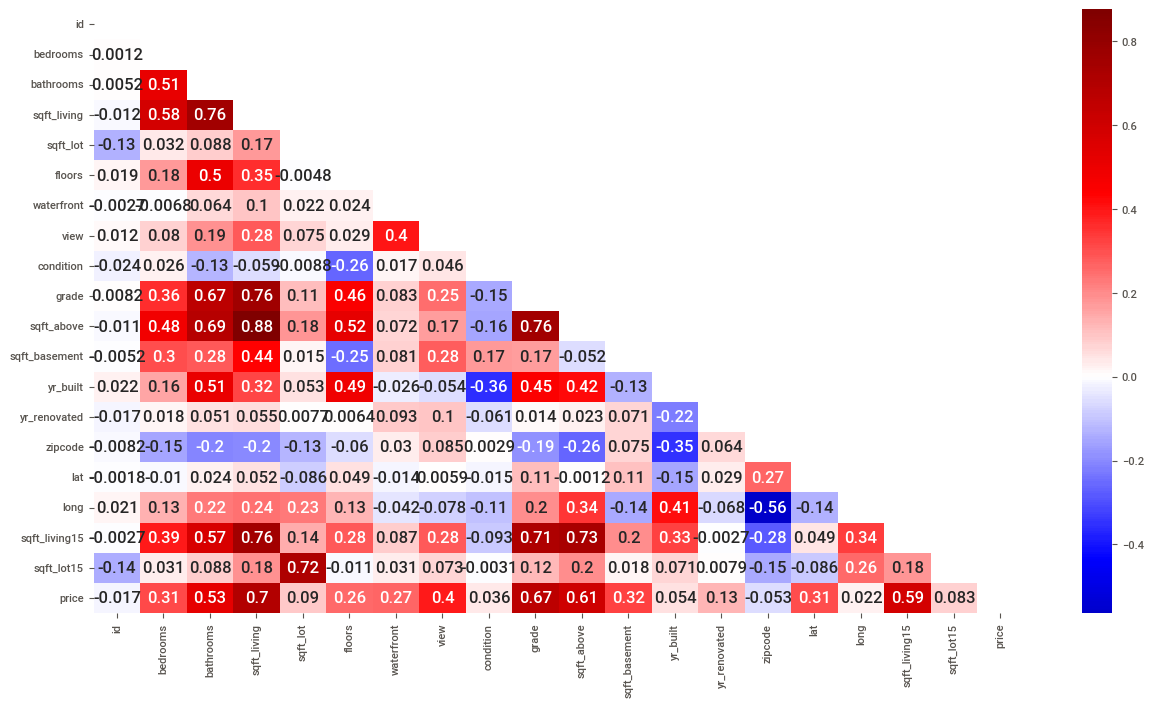

In [12]:
# correlation matrix heatmap 
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df.corr(),mask=mask, annot=True,cmap='seismic',center=0);

In [13]:
#change renovated column into 0 and 1.  0 = no renovation 1= renovation 
df.loc[df['yr_renovated'] > 1900, 'yr_renovated'] = 1

In [14]:
df.head()

id        date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  13/10/2014         3       1.00         1180      5650     1.0   
1  6414100192  09/12/2014         3       2.25         2570      7242     2.0   
2  5631500400  25/02/2015         2       1.00          770     10000     1.0   
3  2487200875  09/12/2014         4       3.00         1960      5000     1.0   
4  1954400510  18/02/2015         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0           0     0          3  ...        1180              0      1955   
1           0     0          3  ...        2170            400      1951   
2           0     0          3  ...         770              0      1933   
3           0     0          5  ...        1050            910      1965   
4           0     0          3  ...        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1             1    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000  
3             0    98136  47.5208 -122.393           1360        5000  604000  
4             0    98074  47.6168 -122.045           1800        7503  510000  

[5 rows x 21 columns]

In [15]:
df

id        date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  13/10/2014         3       1.00         1180      5650   
1      6414100192  09/12/2014         3       2.25         2570      7242   
2      5631500400  25/02/2015         2       1.00          770     10000   
3      2487200875  09/12/2014         4       3.00         1960      5000   
4      1954400510  18/02/2015         3       2.00         1680      8080   
...           ...         ...       ...        ...          ...       ...   
21592   263000018  21/05/2014         3       2.50         1530      1131   
21593  6600060120  23/02/2015         4       2.50         2310      5813   
21594  1523300141  23/06/2014         2       0.75         1020      1350   
21595   291310100  16/01/2015         3       2.50         1600      2388   
21596  1523300157  15/10/2014         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0         1.0           0     0          3  ...        1180              0   
1         2.0           0     0          3  ...        2170            400   
2         1.0           0     0          3  ...         770              0   
3         1.0           0     0          5  ...        1050            910   
4         1.0           0     0          3  ...        1680              0   
...       ...         ...   ...        ...  ...         ...            ...   
21592     3.0           0     0          3  ...        1530              0   
21593     2.0           0     0          3  ...        2310              0   
21594     2.0           0     0          3  ...        1020              0   
21595     2.0           0     0          3  ...        1600              0   
21596     2.0           0     0          3  ...        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951             1    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009             0    98103  47.6993 -122.346           1530   
21593      2014             0    98146  47.5107 -122.362           1830   
21594      2009             0    98144  47.5944 -122.299           1020   
21595      2004             0    98027  47.5345 -122.069           1410   
21596      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15   price  
0            5650  221900  
1            7639  538000  
2            8062  180000  
3            5000  604000  
4            7503  510000  
...           ...     ...  
21592        1509  360000  
21593        7200  400000  
21594        2007  402101  
21595        1287  400000  
21596        1357  325000  

[21597 rows x 21 columns]

In [16]:
df.drop(['id', 'date'], axis = 1, inplace = True) 

In [17]:
df

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131     3.0           0     0   
21593         4       2.50         2310      5813     2.0           0     0   
21594         2       0.75         1020      1350     2.0           0     0   
21595         3       2.50         1600      2388     2.0           0     0   
21596         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0              3      7        1180              0      1955             0   
1              3      7        2170            400      1951             1   
2              3      6         770              0      1933             0   
3              5      7        1050            910      1965             0   
4              3      8        1680              0      1987             0   
...          ...    ...         ...            ...       ...           ...   
21592          3      8        1530              0      2009             0   
21593          3      8        2310              0      2014             0   
21594          3      7        1020              0      2009             0   
21595          3      8        1600              0      2004             0   
21596          3      7        1020              0      2008             0   

       zipcode      lat     long  sqft_living15  sqft_lot15   price  
0        98178  47.5112 -122.257           1340        5650  221900  
1        98125  47.7210 -122.319           1690        7639  538000  
2        98028  47.7379 -122.233           2720        8062  180000  
3        98136  47.5208 -122.393           1360        5000  604000  
4        98074  47.6168 -122.045           1800        7503  510000  
...        ...      ...      ...            ...         ...     ...  
21592    98103  47.6993 -122.346           1530        1509  360000  
21593    98146  47.5107 -122.362           1830        7200  400000  
21594    98144  47.5944 -122.299           1020        2007  402101  
21595    98027  47.5345 -122.069           1410        1287  400000  
21596    98144  47.5941 -122.299           1020        1357  325000  

[21597 rows x 19 columns]

In [18]:
#rescale the features

In [19]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [20]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price']

In [21]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler()
df[columns] = min_max.fit_transform(df[columns])

### select target and independent features

In [22]:
y = df['price']

In [23]:
X= df.drop(['price'], axis = 1)

In [24]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15117 entries, 8816 to 5640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       15117 non-null  float64
 1   bathrooms      15117 non-null  float64
 2   sqft_living    15117 non-null  float64
 3   sqft_lot       15117 non-null  float64
 4   floors         15117 non-null  float64
 5   waterfront     15117 non-null  float64
 6   view           15117 non-null  float64
 7   condition      15117 non-null  float64
 8   grade          15117 non-null  float64
 9   sqft_above     15117 non-null  float64
 10  sqft_basement  15117 non-null  float64
 11  yr_built       15117 non-null  float64
 12  yr_renovated   15117 non-null  float64
 13  zipcode        15117 non-null  float64
 14  lat            15117 non-null  float64
 15  long           15117 non-null  float64
 16  sqft_living15  15117 non-null  float64
 17  sqft_lot15     15117 non-null  float64
 18  pric

In [26]:
df_train.shape

(15117, 19)

In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480 entries, 7189 to 12154
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       6480 non-null   float64
 1   bathrooms      6480 non-null   float64
 2   sqft_living    6480 non-null   float64
 3   sqft_lot       6480 non-null   float64
 4   floors         6480 non-null   float64
 5   waterfront     6480 non-null   float64
 6   view           6480 non-null   float64
 7   condition      6480 non-null   float64
 8   grade          6480 non-null   float64
 9   sqft_above     6480 non-null   float64
 10  sqft_basement  6480 non-null   float64
 11  yr_built       6480 non-null   float64
 12  yr_renovated   6480 non-null   float64
 13  zipcode        6480 non-null   float64
 14  lat            6480 non-null   float64
 15  long           6480 non-null   float64
 16  sqft_living15  6480 non-null   float64
 17  sqft_lot15     6480 non-null   float64
 18  pric

In [28]:
df_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

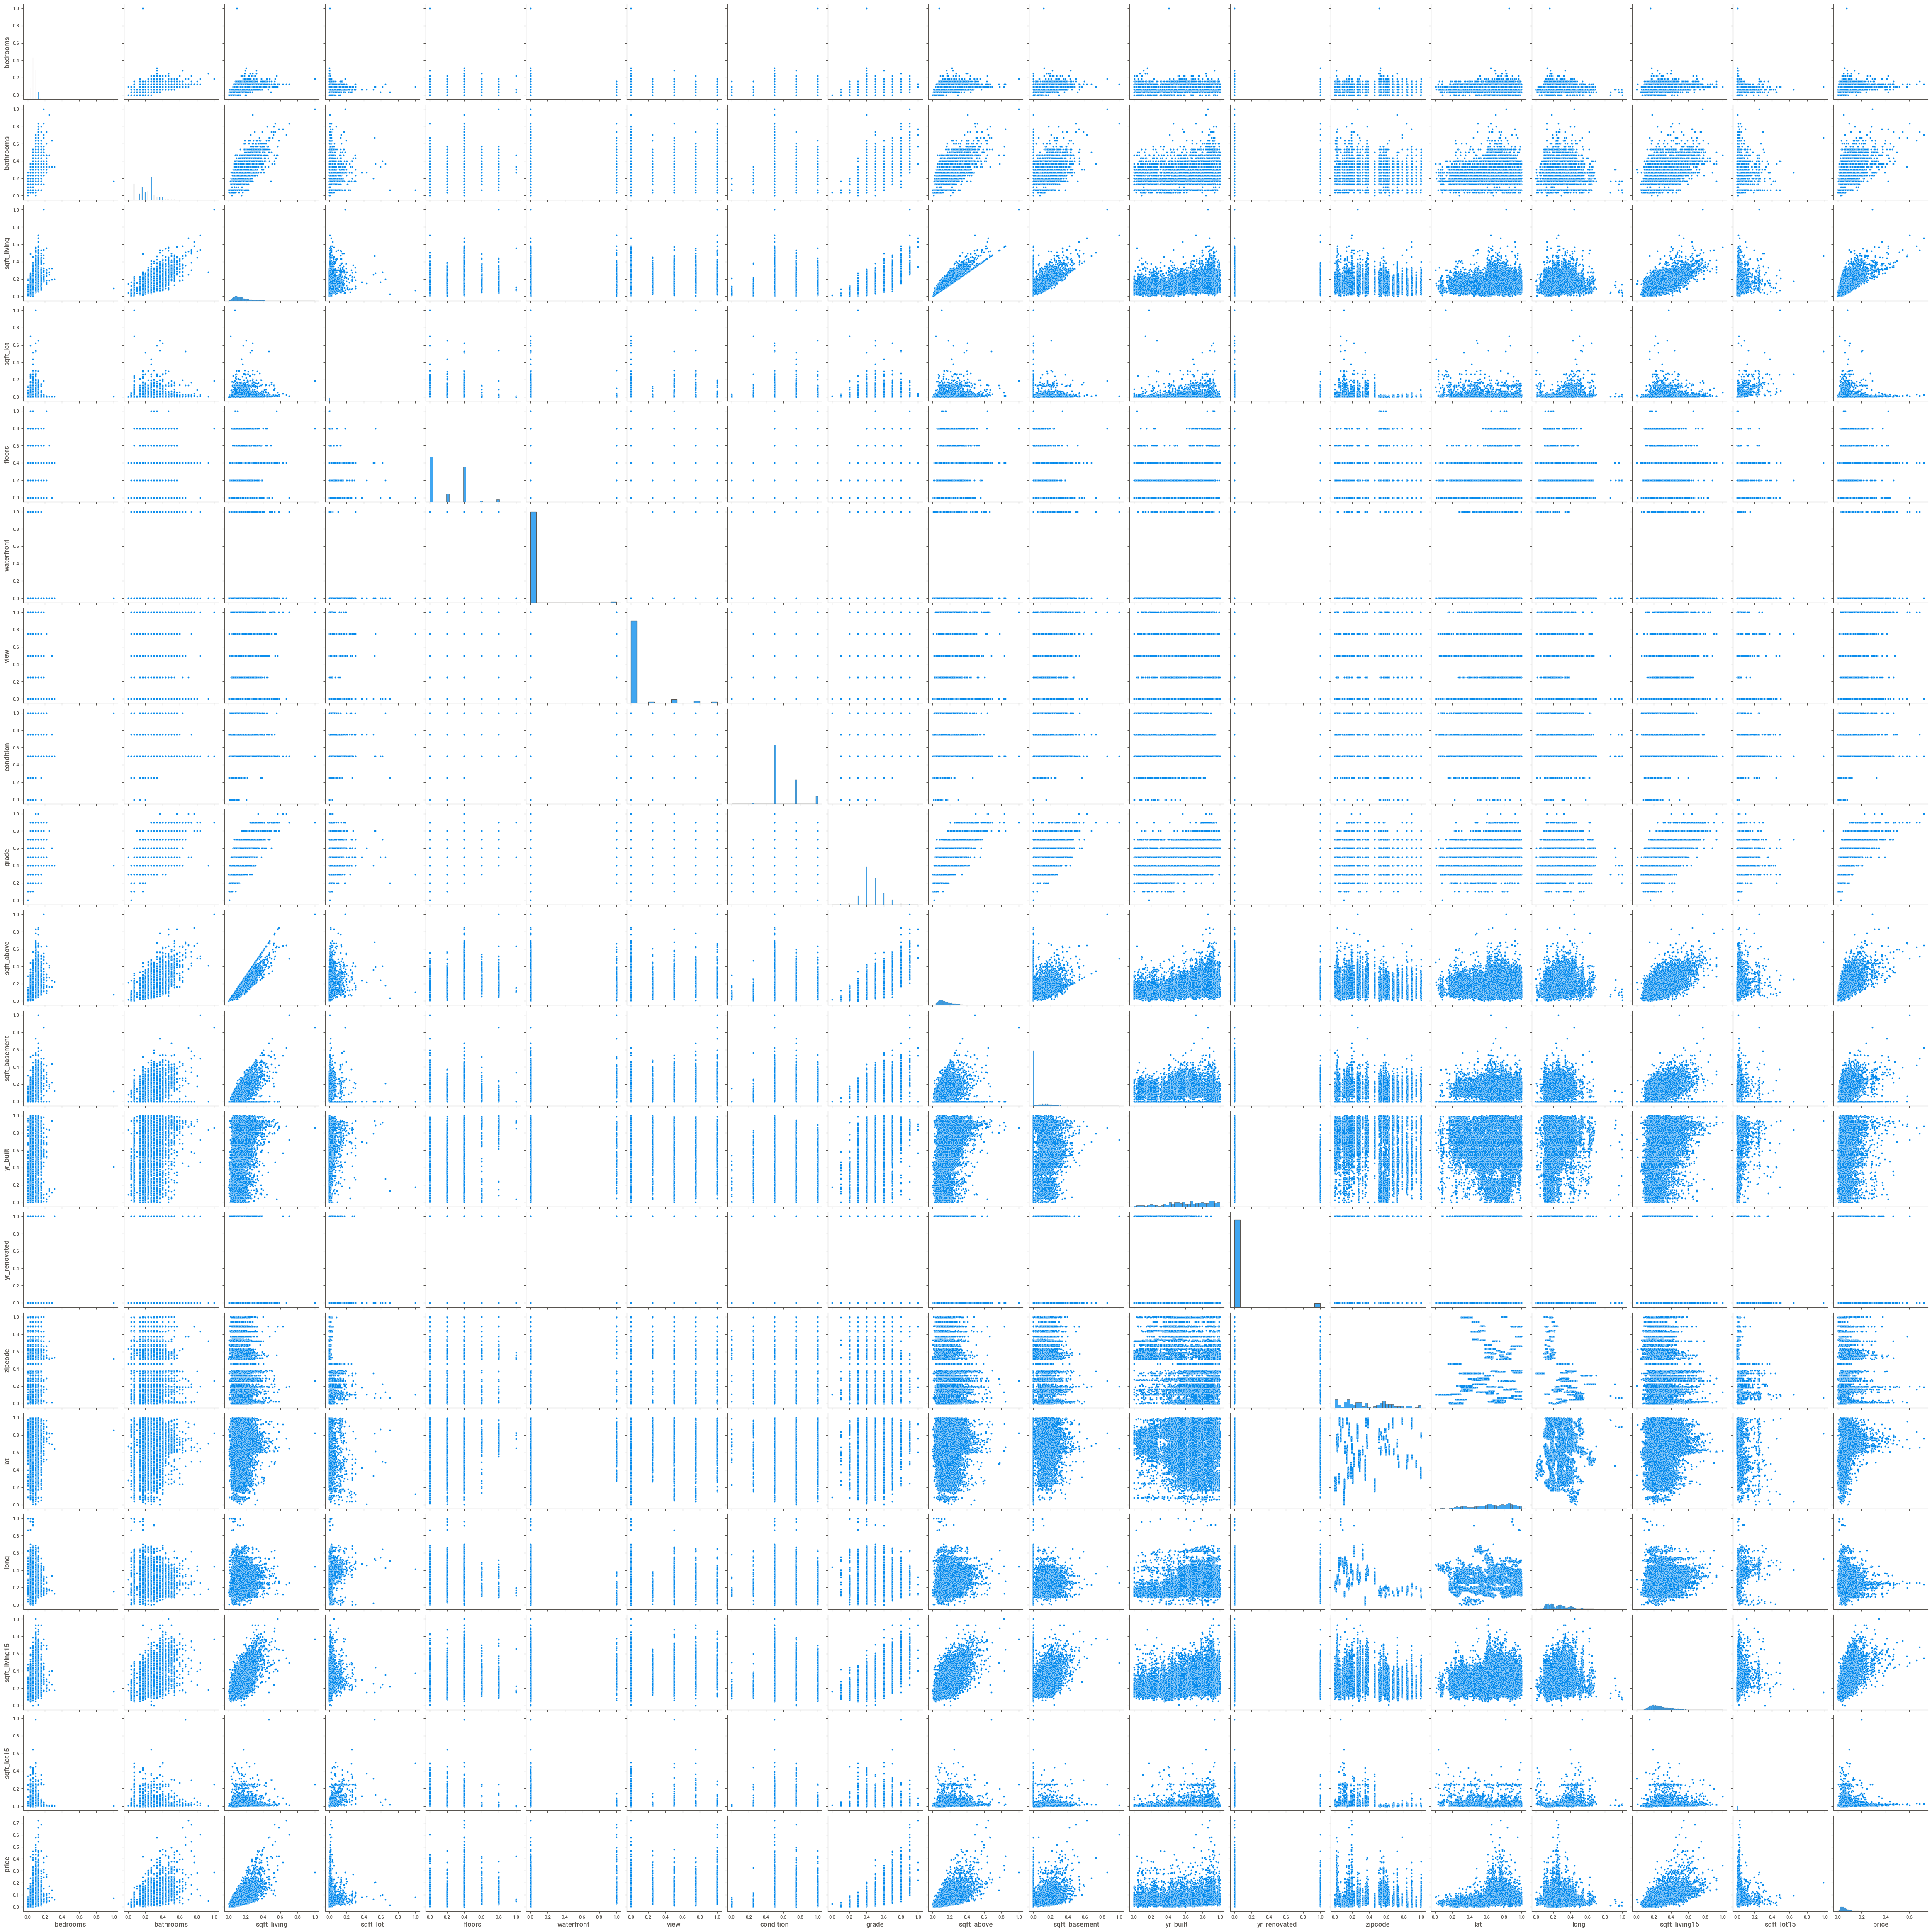

In [29]:
sns.pairplot(df_train) 
plt.show()

In [29]:
X_train, X_test,y_train,y_test=train_test_split(X,y)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_prediction=regressor.predict(X_test)

In [32]:
print('Linear Regression Score is %s'%regressor.score(X_test,y_test))

Linear Regression Score is 0.7111597964930441


## try another KNN regression

In [42]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mse

In [ ]:
mse

In [43]:
yR = df['price']

In [44]:
XR= df.drop(['price'], axis = 1)

In [45]:
X_trainR, X_testR,y_trainR,y_testR = train_test_split(X,y, test_size=0.30, random_state=40)

In [46]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)

In [47]:
neigh.fit(X_trainR, y_trainR)

KNeighborsRegressor()

In [48]:
r2(y_testR, y_predR)

NameError: name 'y_predR' is not defined